In [1]:
import numpy as np
import gym
import random

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
env = gym.make('Taxi-v2')
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))
qtable

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [4]:
total_episodes = 50000
total_test_episodes = 100
max_steps = 99

learning_rate = 0.7
gamma = 1 / np.exp(1)

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01

In [5]:
np.random.uniform(0, 1, 1)

array([0.12436457])

In [6]:
def cum_mean(a):
    values = []
    total_value = 0
    for i, value in enumerate(a):
        total_value += value
        values.append(total_value / (i + 1))
        
    return values

def plot_cum_mean(a):
    values = cum_mean(a)
    
    plt.figure(figsize = (4, 4))
    plt.plot(values, 'ro');
    plt.title('Cumulative Mean Score');
    plt.xlabel('Episode'); plt.ylabel('Score');
    plt.show();

In [7]:
cum_mean([4, 5, 6])

[4.0, 4.5, 5.0]

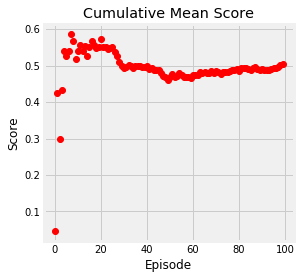

In [8]:
plot_cum_mean(np.random.uniform(0, 1, 100))

Episode 4999 Current Reward: 7 Average Reward: -3.09
Current Epsilon 0.01


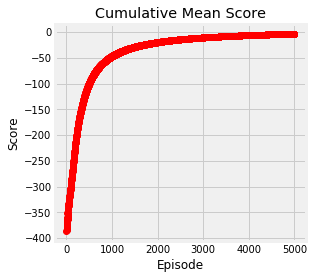

Episode 9999 Current Reward: 9 Average Reward: 2.43
Current Epsilon 0.01


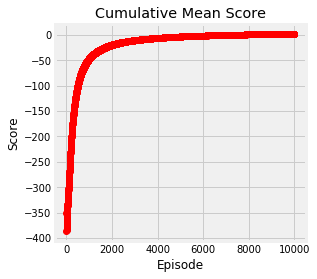

Episode 14999 Current Reward: 6 Average Reward: 4.27
Current Epsilon 0.01


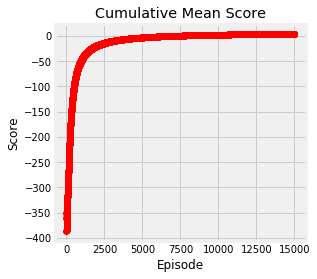

Episode 19999 Current Reward: 11 Average Reward: 5.19
Current Epsilon 0.01


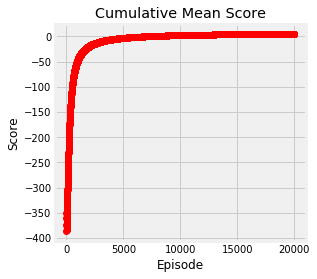

In [9]:
qtable = np.zeros((env.observation_space.n, env.action_space.n))

total_episodes = 20000
total_test_episodes = 100
max_steps = 99

learning_rate = 0.7
gamma = 1 / np.exp(1)

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01

all_rewards = []

for episode in range(total_episodes):
    
    # Make sure to reset step
    state = env.reset()
    step = 0
    done = False
    episode_reward = 0
    
    for step in range(max_steps):
    
        # Random number for tradeoff
        exp_exp_tradeoff = np.random.uniform(0, 1, 1)[0]

        # Exploit
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state, :])
        # Explore
        else:
            action = env.action_space.sample()
        
        # Take the step
        new_state, reward, done, info = env.step(action)
        episode_reward += reward
        
        # Update qtable
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        if done:
            break
        
        # Update state
        state = new_state
        
    all_rewards.append(episode_reward)
    
    # Decay epsilon
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    if (episode+1) % 5000 == 0:
        print(f"Episode {episode} Current Reward: {round(episode_reward, 2)} Average Reward: {round(np.mean(all_rewards), 2)}")
        print(f"Current Epsilon {round(epsilon, 2)}")
        plot_cum_mean(all_rewards)
        

In [10]:
qtable

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -1.57786859,  -1.57092707,  -1.5777396 ,  -1.57088549,
         -1.55168261, -10.56997518],
       [ -1.55171966,  -1.50176333,  -1.5517665 ,  -1.50465648,
         -1.35813193, -10.48386039],
       ...,
       [ -1.53251382,  -0.9797728 ,  -1.51705613,  -1.5349832 ,
         -9.1       ,  -7.        ],
       [ -1.57570464,  -1.57123409,  -1.57374456,  -1.57409458,
        -10.40824258, -10.19162474],
       [ -0.91      ,  -1.09026093,  -0.91      ,  10.63953414,
         -7.        ,  -9.1       ]])

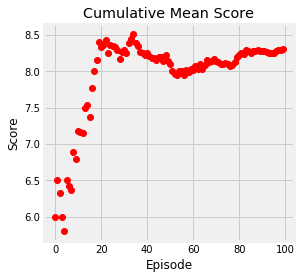

In [11]:
all_rewards = []

# Iterate through each episode
for episode in range(total_test_episodes):
    state = env.reset()
    
    # Make sure to restart counting
    step = 0
    done = False
    episode_reward = 0
    
    # Iterate for maximum number of stpes
    for step in range(max_steps):
        
        # Select and take best action
        action = np.argmax(qtable[state, :])
        new_state, reward, done, info = env.step(action)
        
        episode_reward += reward
        state = new_state
        
        if done:
            break
    
    all_rewards.append(episode_reward)
    
plot_cum_mean(all_rewards)

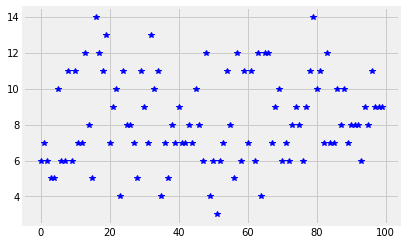

In [12]:
plt.plot(all_rewards, 'b*');